In [5]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
from mafContrib import AngularSpreadMetric
import sqlite3
import pandas as pd

In [1]:
runs = {'1.2': 'baseline_1exp_pairsmix_10yrs.db', '1.3':'baseline_v1.3_10yrs.db'}

In [17]:
raw = []
for key in runs:
    conn = sqlite3.connect(runs[key])
    q = 'select rotSkyPos,rotTelPos from summaryAllProps;'
    data = pd.read_sql(q, conn)
    raw.append(data)
conn.close()

Text(0.5, 1.0, '1.2')

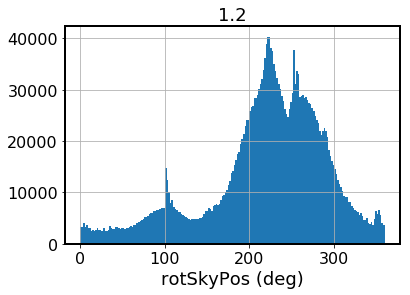

In [18]:
_ = plt.hist(raw[0]['rotSkyPos'], bins=200)
plt.xlabel('rotSkyPos (deg)')
plt.title('1.2')

Text(0.5, 1.0, '1.2')

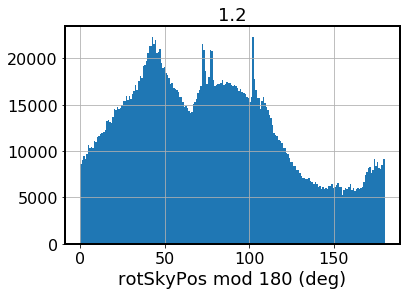

In [19]:
_ = plt.hist(raw[0]['rotSkyPos'] % 180, bins=200)
plt.xlabel('rotSkyPos mod 180 (deg)')
plt.title('1.2')

Text(0.5, 1.0, '1.2')

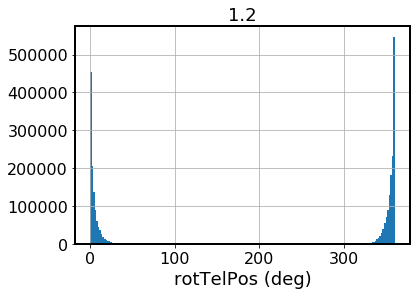

In [20]:
_ = plt.hist(raw[0]['rotTelPos'], bins=200)
plt.xlabel('rotTelPos (deg)')
plt.title('1.2')

Text(0.5, 1.0, '1.2')

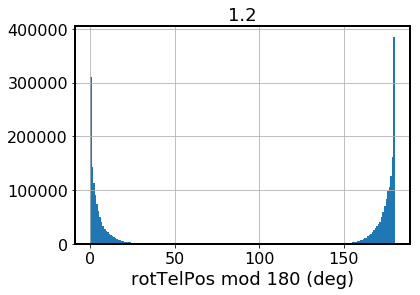

In [26]:
_ = plt.hist(raw[0]['rotTelPos'] % 180, bins=200)
plt.xlabel('rotTelPos mod 180 (deg)')
plt.title('1.2')

Text(0.5, 1.0, '1.3')

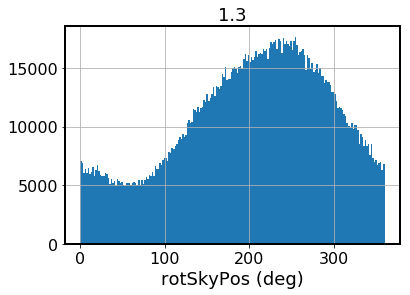

In [21]:
_ = plt.hist(raw[1]['rotSkyPos'], bins=200)
plt.xlabel('rotSkyPos (deg)')
plt.title('1.3')

Text(0.5, 1.0, '1.3')

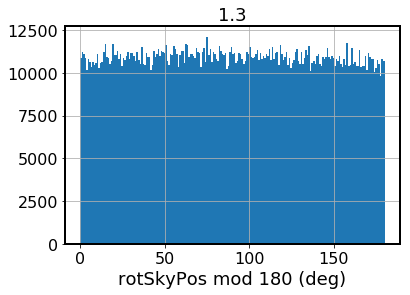

In [24]:
_ = plt.hist(raw[1]['rotSkyPos'] % 180, bins=200)
plt.xlabel('rotSkyPos mod 180 (deg)')
plt.title('1.3')

Text(0.5, 1.0, '1.3')

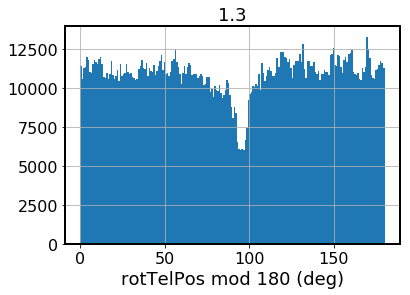

In [27]:
_ = plt.hist(raw[1]['rotTelPos'] % 180, bins=200)
plt.xlabel('rotTelPos mod 180 (deg)')
plt.title('1.3')

Text(0.5, 1.0, '1.3')

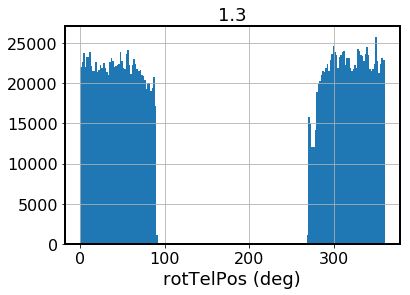

In [28]:
_ = plt.hist(raw[1]['rotTelPos'], bins=200)
plt.xlabel('rotTelPos (deg)')
plt.title('1.3')

In [29]:
dbFile = runs['1.2']
# This connection checks which version it thinks the database is and should do the right thing schema-wise
conn = db.OpsimDatabase(dbFile)
outDir='temp'
resultsDb = db.ResultsDb(outDir=outDir)

In [31]:
bundleList = []
sql = 'filter="i"'
slicer = slicers.HealpixSlicer()
metric = AngularSpreadMetric('rotSkyPos', period=180.)
bundleList.append(metricBundles.MetricBundle(metric,slicer,sql))

metric = AngularSpreadMetric('rotTelPos', period=180.)
bundleList.append(metricBundles.MetricBundle(metric,slicer,sql))


Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


Querying database SummaryAllProps with constraint filter="i" for columns ['fieldRA', 'fieldDec', 'rotSkyPos']
Found 554977 visits
Running:  ['opsim_AngularSpread_rotSkyPos_i_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter="i"" constraint now.
monopole: 0.171132  dipole: lon: -164.862, lat: -58.7614, amp: 0.233841
Plotting complete.


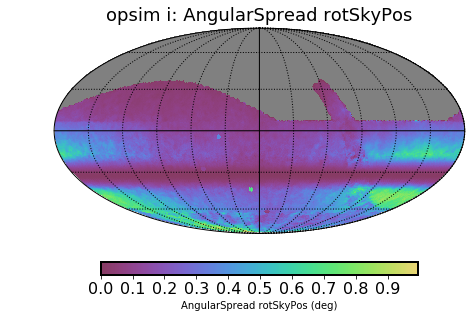

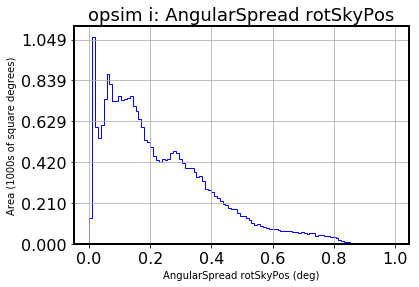

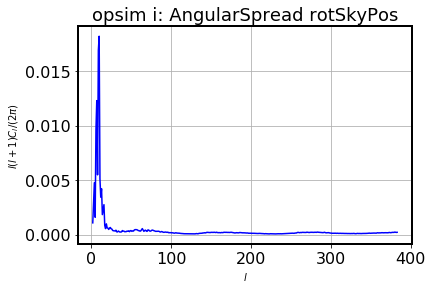

In [32]:
bd = metricBundles.makeBundlesDictFromList(bundleList)
bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()

bg.plotAll(closefigs=False)

In [33]:
dbFile = runs['1.3']
# This connection checks which version it thinks the database is and should do the right thing schema-wise
conn = db.OpsimDatabase(dbFile)
outDir='temp'
resultsDb = db.ResultsDb(outDir=outDir)

In [34]:
bundleList = []
sql = 'filter="i"'
slicer = slicers.HealpixSlicer()
metric = AngularSpreadMetric('rotSkyPos', period=180.)
bundleList.append(metricBundles.MetricBundle(metric,slicer,sql))

metric = AngularSpreadMetric('rotTelPos', period=180.)
bundleList.append(metricBundles.MetricBundle(metric,slicer,sql))


Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


Querying database SummaryAllProps with constraint filter="i" for columns ['rotTelPos', 'fieldRA', 'fieldDec', 'rotSkyPos']
Found 470861 visits
Running:  ['opsim_AngularSpread_rotSkyPos_i_HEAL', 'opsim_AngularSpread_rotTelPos_i_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter="i"" constraint now.


/Users/yoachim/git_repos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 358 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 0.89077  dipole: lon: 115.089, lat: -58.4819, amp: 0.033423


/Users/yoachim/git_repos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 336 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 0.881853  dipole: lon: 108.284, lat: -54.257, amp: 0.0340483
Plotting complete.


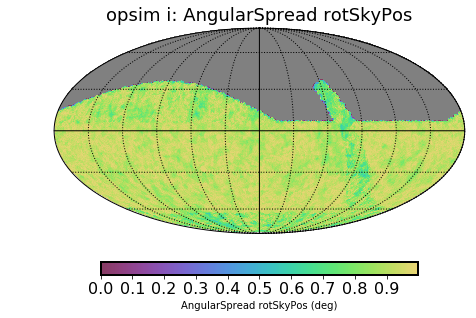

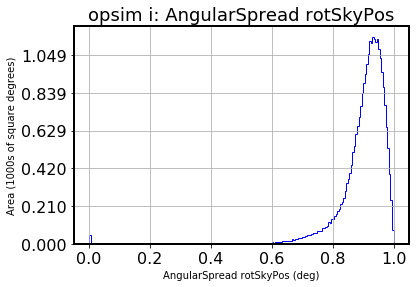

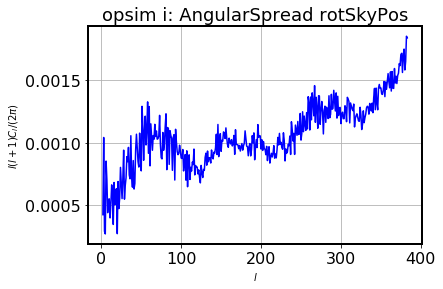

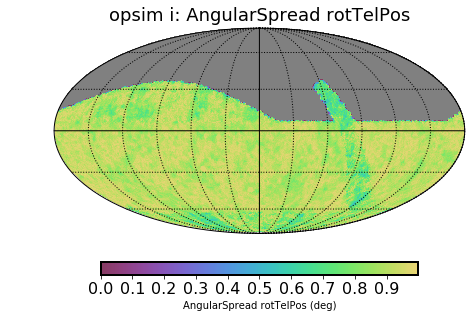

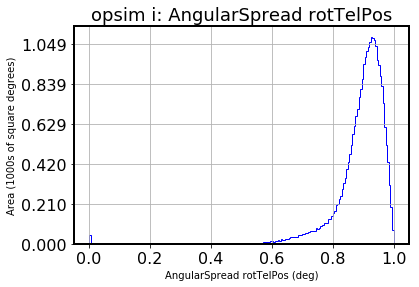

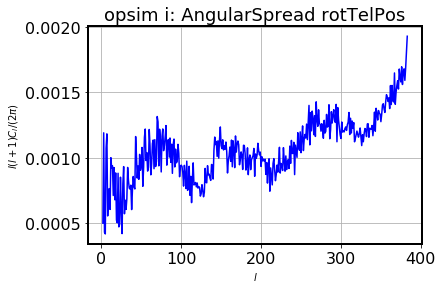

In [35]:
bd = metricBundles.makeBundlesDictFromList(bundleList)
bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()

bg.plotAll(closefigs=False)